In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
day = pd.read_csv('day.csv')
hour = pd.read_csv('hour.csv')
concrete_data = pd.read_csv('concrete_data.csv')

# Data Overview

In [18]:
day.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [19]:
hour.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [20]:
concrete_data.head(1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99


# Pertanyaan Terkait Data

> 1. Apakah ada korelasi antara Cement dan Strength?
> 2. Apakah ada korelasi antara Age dan Strength?

I will use concrete_data.csv only

# Data Processing

In [21]:
concrete_data.describe(include='all')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [22]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


> there is no missing value in the dataset, so no need to handle missing value

## Outlier Detection

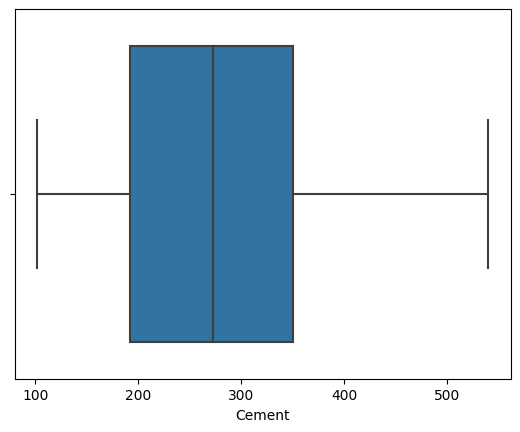

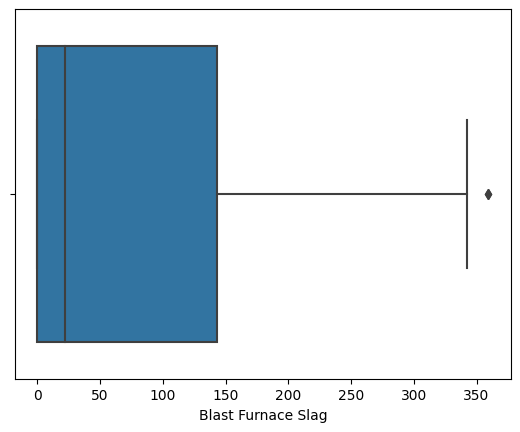

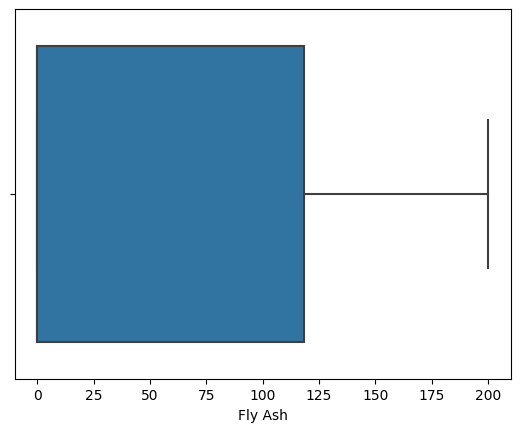

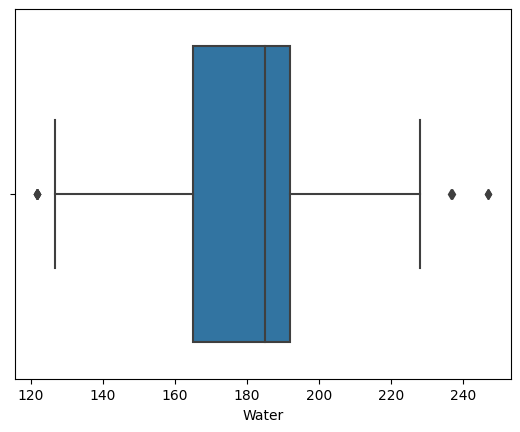

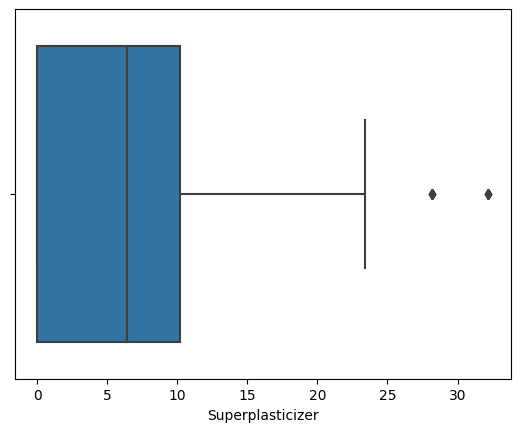

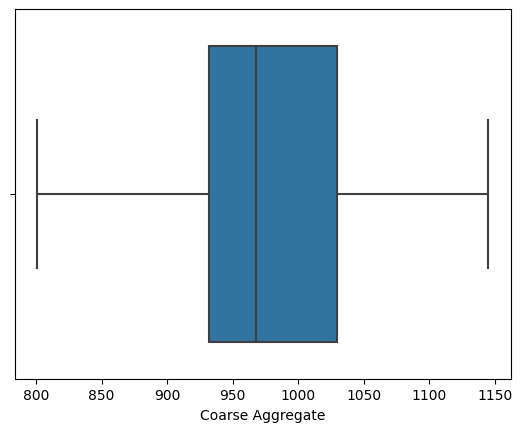

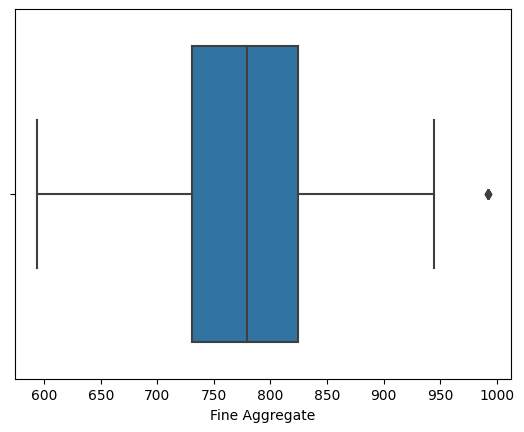

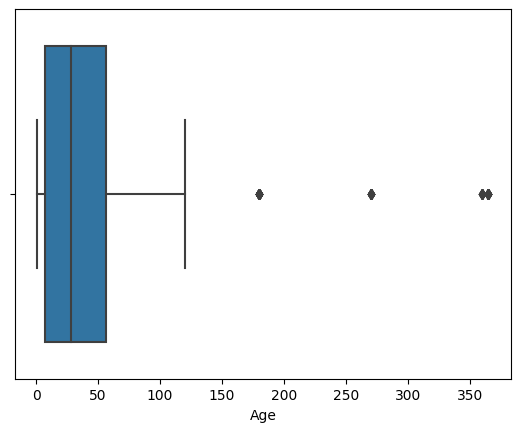

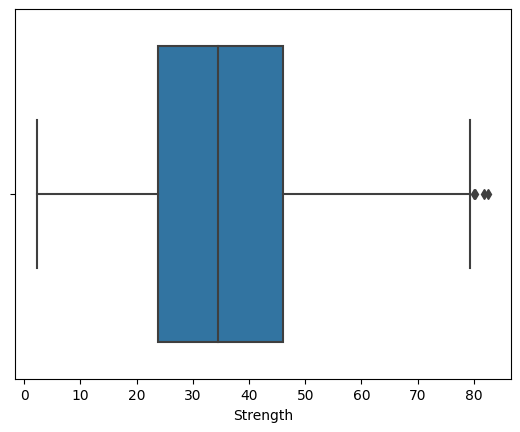

In [23]:
# create box plot for each column
for column in concrete_data.columns:
    plt.figure()
    sns.boxplot(x=concrete_data[column])


In [24]:
# drop outlier from each column
print(f"size before drop outlier: {concrete_data.shape}")
for column in concrete_data.columns:
    q1 = concrete_data[column].quantile(0.25)
    q3 = concrete_data[column].quantile(0.75)
    iqr = q3 - q1
    concrete_data = concrete_data[~((concrete_data[column] < (q1 - 1.5 * iqr)) | (concrete_data[column] > (q3 + 1.5 * iqr)))]
print(f"size after drop outlier: {concrete_data.shape}")

size before drop outlier: (1030, 9)
size after drop outlier: (926, 9)


## Duplicate Data

In [25]:
print(f"before drop duplicate: {concrete_data.shape}")
concrete_data = concrete_data.drop_duplicates()
print(f"after drop duplicate: {concrete_data.shape}")

before drop duplicate: (926, 9)
after drop duplicate: (901, 9)


# Exploratory Data Analysis

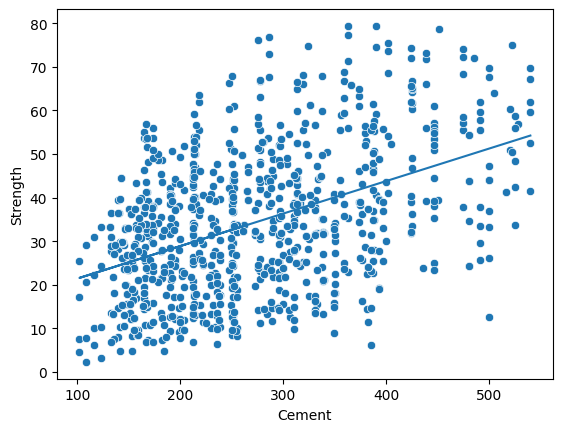

In [26]:
sns.scatterplot(x='Cement', y='Strength', data=concrete_data)
plt.xlabel('Cement')
plt.ylabel('Strength')

m, b = np.polyfit(concrete_data['Cement'], concrete_data['Strength'], 1)
plt.plot(concrete_data['Cement'], m*concrete_data['Cement'] + b)

plt.show()

> as you can see based on the visualization above, Cement and Strength have a positive correlation. The more cement, the more strength. 

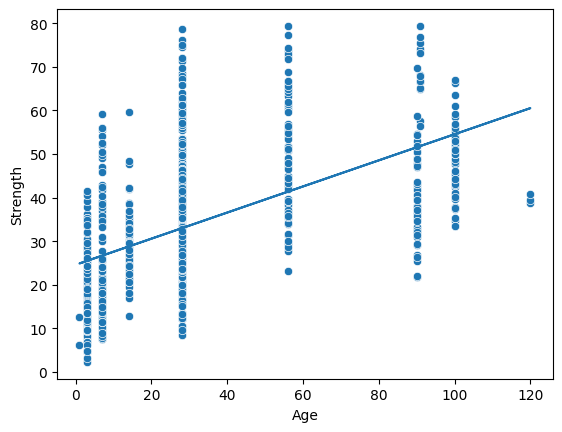

In [27]:
sns.scatterplot(x='Age', y='Strength', data=concrete_data)
plt.xlabel('Age')
plt.ylabel('Strength')

m, b = np.polyfit(concrete_data['Age'], concrete_data['Strength'], 1)
plt.plot(concrete_data['Age'], m*concrete_data['Age'] + b)

plt.show()

> as you can see the visualization above, Age and Strength doesn't have a proper correlation. That's why I think, they both have no correlation at all.